In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/df4.csv')

In [ ]:
df.head()

,Unnamed: 0,COUNT(I.INT_SEQ_NO),SUM(I.INT_PAYABLE_AMT),INT_SUM_INSURED,INT_DATE_LOSS,INT_PERIOD_TO,PAY_CAT_DESC,ANNUAL_TOTAL_PREMIUM,CUS_INDV_TITLE,blackList_status,Duration
0,0,1,51040.0,750000.0,2023-04-18,2023-11-15,60 DAY CREDIT,12321.64,MR,0,211
1,1,2,32000.0,2000000.0,2023-01-10,2023-07-11,60 DAY CREDIT,32077.48,MR,0,182
2,2,14,1549800.0,3500000.0,2020-08-03,2021-02-05,60 DAY CREDIT,74768.26,MR,1,186
3,3,1,107915.0,2500000.0,2023-12-05,2024-10-09,DIRECT,30824.58,MR,0,309
4,4,1,0.0,2500000.0,2025-11-27,2026-02-09,60 DAY CREDIT,32485.80,MRS,0,74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552259 entries, 0 to 552258
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              552259 non-null  int64  
 1   COUNT(I.INT_SEQ_NO)     552259 non-null  int64  
 2   SUM(I.INT_PAYABLE_AMT)  546803 non-null  float64
 3   INT_SUM_INSURED         552259 non-null  float64
 4   INT_DATE_LOSS           552259 non-null  object 
 5   INT_PERIOD_TO           552259 non-null  object 
 6   PAY_CAT_DESC            552259 non-null  object 
 7   ANNUAL_TOTAL_PREMIUM    552259 non-null  float64
 8   CUS_INDV_TITLE          552208 non-null  object 
 9   blackList_status        552259 non-null  int64  
 10  Duration                552259 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 46.3+ MB


In [ ]:
df=df.fillna(0)

In [ ]:
df = pd.get_dummies(
    df,
    columns=['PAY_CAT_DESC', 'CUS_INDV_TITLE'],
    drop_first=True
)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552259 entries, 0 to 552258
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              552259 non-null  int64  
 1   COUNT(I.INT_SEQ_NO)     552259 non-null  int64  
 2   SUM(I.INT_PAYABLE_AMT)  552259 non-null  float64
 3   INT_SUM_INSURED         552259 non-null  float64
 4   INT_DATE_LOSS           552259 non-null  object 
 5   INT_PERIOD_TO           552259 non-null  object 
 6   ANNUAL_TOTAL_PREMIUM    552259 non-null  float64
 7   blackList_status        552259 non-null  int64  
 8   Duration                552259 non-null  int64  
 9   PAY_CAT_DESC_DIRECT     552259 non-null  bool   
 10  CUS_INDV_TITLE_CAPT     552259 non-null  bool   
 11  CUS_INDV_TITLE_DR       552259 non-null  bool   
 12  CUS_INDV_TITLE_DRMRS    552259 non-null  bool   
 13  CUS_INDV_TITLE_DRMSS    552259 non-null  bool   
 14  CUS_INDV_TITLE_GOVER

In [27]:
df.describe()

,Unnamed: 0,COUNT(I.INT_SEQ_NO),SUM(I.INT_PAYABLE_AMT),INT_SUM_INSURED,ANNUAL_TOTAL_PREMIUM,blackList_status,Duration
count,552259.000000,552259.000000,5.522590e+05,5.522590e+05,5.522590e+05,552259.000000,552259.000000
mean,276129.000000,1.113077,9.383292e+04,9.989400e+06,7.808626e+04,0.045618,189.246259
std,159423.585493,0.751095,6.469578e+05,6.376707e+07,2.570999e+05,0.208656,106.551683
min,0.000000,1.000000,-9.393000e+03,0.000000e+00,7.100000e+00,0.000000,-239.000000
25%,138064.500000,1.000000,0.000000e+00,1.500000e+06,2.269859e+04,0.000000,97.000000
50%,276129.000000,1.000000,2.400000e+04,3.100000e+06,4.360855e+04,0.000000,194.000000
75%,414193.500000,1.000000,6.240000e+04,5.200000e+06,7.240925e+04,0.000000,283.000000
max,552258.000000,39.000000,1.298976e+08,1.890000e+09,1.053515e+07,1.000000,917.000000


In [28]:
df.columns

Index(['Unnamed: 0', 'COUNT(I.INT_SEQ_NO)', 'SUM(I.INT_PAYABLE_AMT)',
       'INT_SUM_INSURED', 'INT_DATE_LOSS', 'INT_PERIOD_TO',
       'ANNUAL_TOTAL_PREMIUM', 'blackList_status', 'Duration',
       'PAY_CAT_DESC_DIRECT', 'CUS_INDV_TITLE_CAPT', 'CUS_INDV_TITLE_DR',
       'CUS_INDV_TITLE_DRMRS', 'CUS_INDV_TITLE_DRMSS', 'CUS_INDV_TITLE_GOVER',
       'CUS_INDV_TITLE_HON', 'CUS_INDV_TITLE_MESSE', 'CUS_INDV_TITLE_MISS',
       'CUS_INDV_TITLE_MR', 'CUS_INDV_TITLE_MRS', 'CUS_INDV_TITLE_MS',
       'CUS_INDV_TITLE_MS.', 'CUS_INDV_TITLE_PROF', 'CUS_INDV_TITLE_REV'],
      dtype='object')

In [29]:
features = [
   'COUNT(I.INT_SEQ_NO)', 'SUM(I.INT_PAYABLE_AMT)',
       'INT_SUM_INSURED',
       'ANNUAL_TOTAL_PREMIUM', 'blackList_status', 'Duration',
       'PAY_CAT_DESC_DIRECT', 'CUS_INDV_TITLE_CAPT', 'CUS_INDV_TITLE_DR',
       'CUS_INDV_TITLE_DRMRS', 'CUS_INDV_TITLE_DRMSS', 'CUS_INDV_TITLE_GOVER',
       'CUS_INDV_TITLE_HON', 'CUS_INDV_TITLE_MESSE', 'CUS_INDV_TITLE_MISS',
       'CUS_INDV_TITLE_MR', 'CUS_INDV_TITLE_MRS', 'CUS_INDV_TITLE_MS',
       'CUS_INDV_TITLE_MS.', 'CUS_INDV_TITLE_PROF', 'CUS_INDV_TITLE_REV'
]

X = df[features]

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


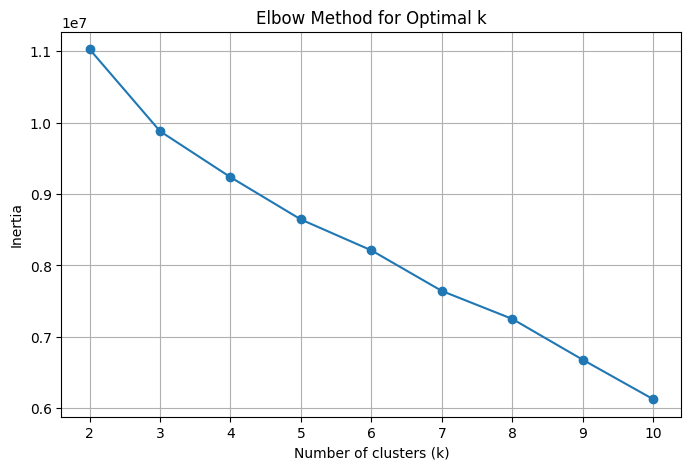

In [31]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [33]:
k = 3  # Example, choose from elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
score = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score: {score:.3f}')


In [ ]:
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=df3['cluster'],
    palette='Set2',
    s=60
)
plt.title('K-Means Clusters (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()
